# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data

df_fh = pd.read_csv('/content/drive/MyDrive/Project1/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows


df_fh.head()
# This command gives the top 5 records in the data set with all columns included.

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here

print("There are", df_fh.shape[0], 'rows and', df_fh.shape[1], "columns.")
#There 1898 rows and 9 columns
# df_fh data frame.shape will give rows and columns in pandas.

There are 1898 rows and 9 columns.


#### Observations:
There are 1898 rows and 9 columns.



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df_fh.info()
#Here we can see the list of columns in the data set annd the Dtype will show the data type for each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   All the Columns have 1898 records indicating there are no missig records in the dataset

*   The columns can be considered both numerical and categorical

 **Numerical Columns**                        
1. cost_of_the_order                 
2. food_preparation_time
3. delivery_time

**Categorical Columns**
1. restaurant_name
2. rating
3. cuisine_type
4. day_of_the_week

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df_fh.isnull().sum()
# isnull() in combination with sum() is used  to display the count of missing values per column
# As we can see below, there are 9 columns in this data set and there are no missing data.

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
So there are 9 columns in the dataset and no missing data in any of the columns, so no need to treat missing data. we analyse further.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df_fh.describe(include='all').T
#The above command will give details of mea min max etc, include='all' includes all columns



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


# Food Preparation time summary


*   Min Food Prep time = 20 mins
*   Average Food Prep time = 27.37 mins
*   Max Food prep time = 35 mins




#### Observations:



1.   Avergage cost of the order is around 16.5 dollars
2.   25% of the orders cost 12.08 dollars or less.
3. we can also notice that some orders cost 4.4 orders and 35.4 dollars which are on the extremes from the mean cost.
4.  food prep and delivery times dont fluctualte a lot from mean.




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here, Lets see how many unique values are there in rating column.
unique_values = df_fh['rating'].unique()
print(unique_values)

['Not given' '5' '3' '4']


In [ ]:
rating_not_given = df_fh[df_fh['rating'] == 'Not given'].shape[0]
# The rating 'Not given' is filtered and then we display the records which have rating = 'Not given'
print(f"The orders which have no proper ratings: {rating_not_given}")



The orders which have no proper ratings: 736


#### Observations:
Well So far we have figured out that ratings are not rightly given to 736 out of 1898 records so far. We also know that there are no real missing values in the data set.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df_fh['order_id'].nunique()
# Here nunique returns the number of unique values for a column in data frame.

1898

In [ ]:
df_fh['customer_id'].nunique()

1200

In [ ]:
df_fh['restaurant_name'].nunique()

178

## Observations
* So we can see that there are only 1200 customers buying food, so there are repeating customers, so customer retention on the food portal is key.
* There are 178 restuarants providing food services in the app, so key is to find out which restaurants are performing better, average and poor based on rating.
* There are also no duplicate orders in the data set

## Cuisine Type

In [ ]:
df_fh['cuisine_type'].nunique()

14

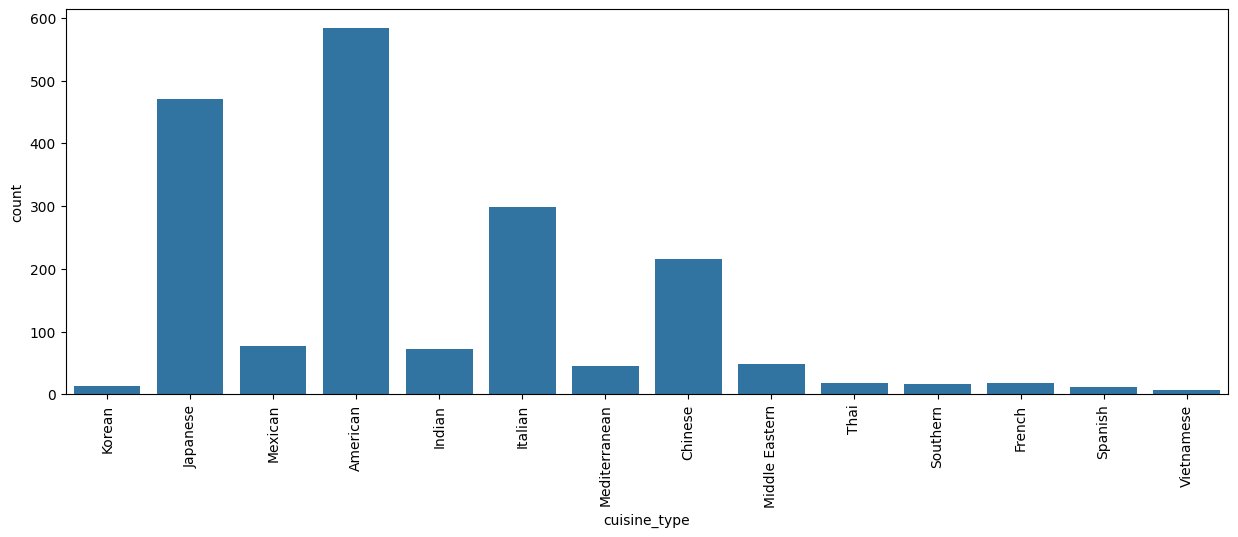

In [ ]:
# Count plot to see the number of orders for each cusine type
plt.figure(figsize = (15,5))
sns.countplot(data = df_fh, x = 'cuisine_type')
plt.xticks(rotation=90)
plt.show()

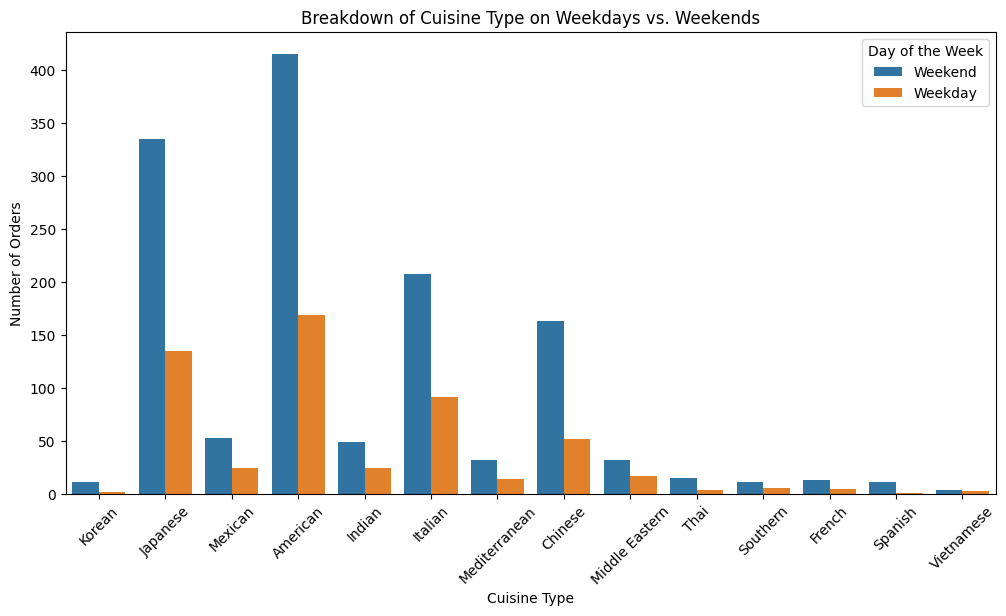

In [ ]:
# Count plot to see the number of each cusine type by taking in the hue factor weekdays/weekends

plt.figure(figsize=(12, 6))
sns.countplot(data=df_fh, x='cuisine_type', hue='day_of_the_week')
plt.title("Breakdown of Cuisine Type on Weekdays vs. Weekends")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')
plt.show()


# Observations on Cuisine Type and Count Plots

* There are 14 cusine types - Based on the count plot above for cuisine type we know American and Japanese have the most of the orders with Vietnamese lowest.
* The American and Japanese cusine type are also most popular locally on both weekdays and weekends
* American, Japanese, Chinese and Italian have more than 100 orders.

# Cost of the Order

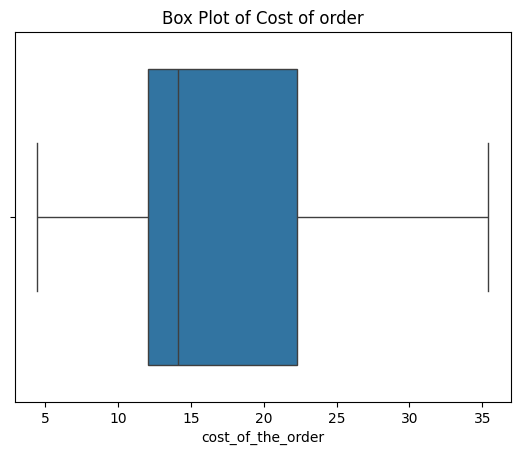

In [ ]:
# Write the code here

# Plotting Box Plot to see the distribution of costs
sns.boxplot(data=df_fh,x='cost_of_the_order')
plt.title('Box Plot of Cost of order')
plt.show()



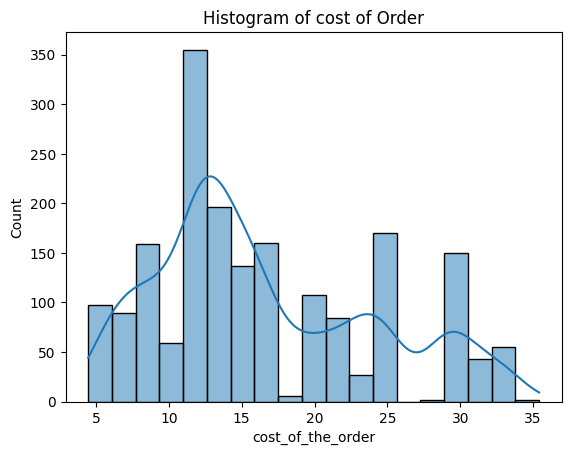

In [ ]:
# Histogram to see the distribution of costs
sns.histplot(data=df_fh,x='cost_of_the_order', kde= True)
plt.title('Histogram of cost of Order')
plt.show()


# **Observations on Cost of Order**

1. The density curve (kde=True) confirms this cluster, as the highest point of the curve aligns with the 10-15 dollars range.
2. The peak around the 10-15 dollars range shows the highest frequency of orders.
3. The box plot indicates no outliers. But there are orders which costs more than the typican range , we can see orders above 30 dollars too.
4. The Median in the box plot is closer to the lower quartile as can be seen from the plot above

#### **Delivery Time**

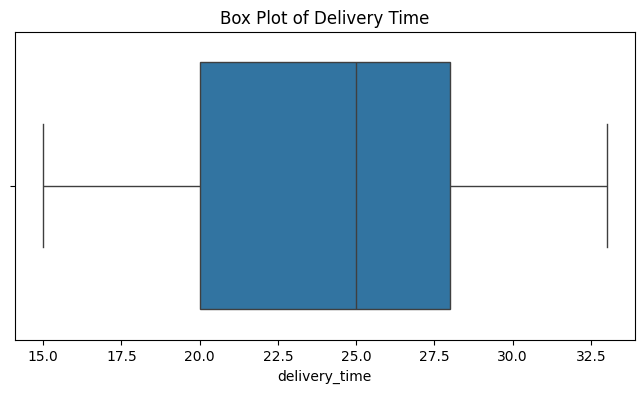

In [ ]:
# Box Plot for the Delivery time
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_fh, x='delivery_time')
plt.title('Box Plot of Delivery Time')
plt.show()

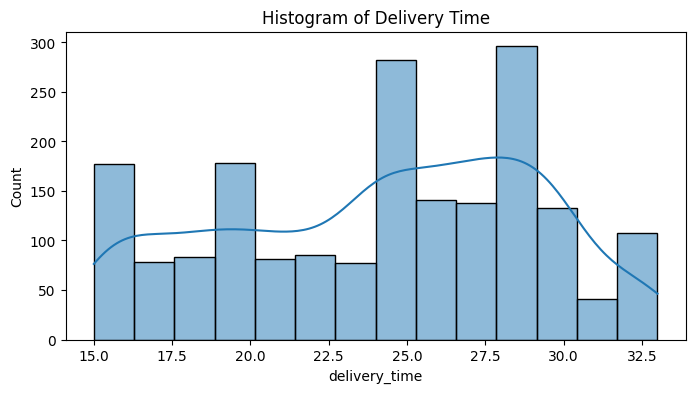

In [ ]:

# Histogram for 'delivery_time' with KDE
plt.figure(figsize=(8, 4))
sns.histplot(data=df_fh, x='delivery_time', stat='count', kde=True)
plt.title('Histogram of Delivery Time')
plt.show()

**Observations on Delivery time**

* The median line inside the box suggests that the typical delivery time for most orders is around 25 minutes, half the orders delivered in less than 25 minutes.
* Some orders are delivered in less than 15 mins and some orders take about 35-40 minutes are so.
* The Peak delivery time is around 25 - 28 minutes, which indicates most of the orders take this amount of time to deliver.

#### **Food Preparation Time**

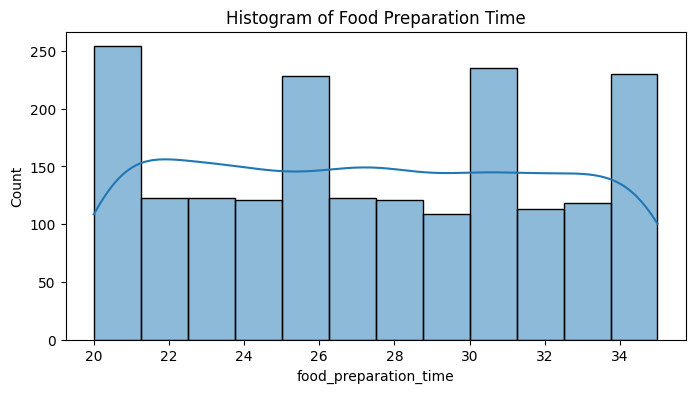

In [ ]:


# Histogram for 'food_preparation_time' with KDE
plt.figure(figsize=(8, 4))
sns.histplot(data=df_fh, x='food_preparation_time', stat='count', kde=True)
plt.title('Histogram of Food Preparation Time')
plt.show()

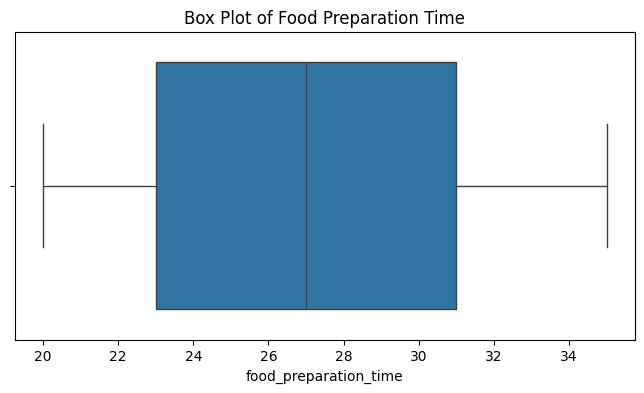

In [ ]:
# Box Plot for Food Preparation time
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_fh, x='food_preparation_time') # we are plotting food preparation data aganst the count using Box Plot
plt.title('Box Plot of Food Preparation Time')
plt.show()

# Observations on Food Preparation Time

* The histogram shows a peak around 25-28 minutes, indicating that this is the most common preparation time range for orders.
* The median line within the box suggests a typical preparation time of around 27 minutes
* The lower whisker starts at around 20 minutes, while the upper whisker ends close to 35 minutes. So for some orders food Prep time is 20 mins min and 35 mins max.
* There are few orders where the food preparation time is over 30 minutes.
Food Preparation time looks fairly consistent

# Ratings

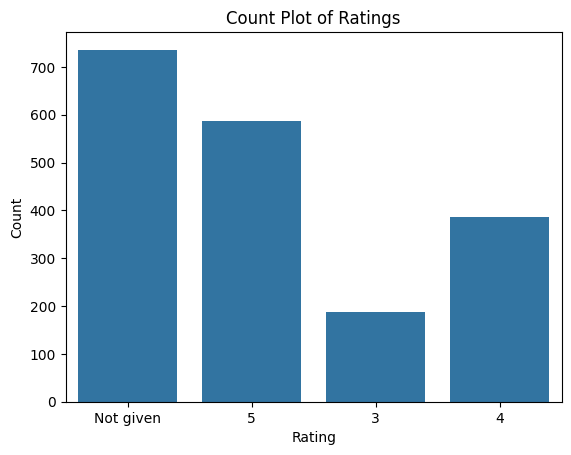

In [ ]:
sns.countplot(data=df_fh, x='rating')  # Plots the count of each unique value in the 'rating' column
plt.title('Count Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Observations

* Significant number of ratings  'Not given',it indicates a substantial portion of orders that were not rated, which could impact the completeness of customer feedback data.
* ratings 5 and 4 make up for most of the orders. This means the food quality is fairly good with reviews.
* ratings of 3 which needs to be looked into for better customer satisfaction.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# The top 5 restaurants can be calculated by:

restaurant_counts = df_fh['restaurant_name'].value_counts().head(5)
# value_counts() counts the occurrences of each unique restaurant name in the restaurant_name column.
# head(5) selects the first 5 top restaurants
restaurant_counts


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
Here we are displaying the top 5 restaurants in the app which have the most orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter for weekend orders
df_weekend = df_fh[df_fh['day_of_the_week'] == 'Weekend']

# Get the most popular cuisine type on weekends along with its count
most_popular_cuisine_weekend = df_weekend['cuisine_type'].value_counts().head(1)

most_popular_cuisine_weekend

,count
cuisine_type,
American,415


#### Observations:
1. As we have been seeing American Cuisine type is most popular even on weekends with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# Find Total number of orders in the dataset

total_orders_count = len(df_fh)
total_orders_count

# Find Orders grester than 20 dollars and storing that in a new data frame

orders_greater_than_20 = df_fh[df_fh['cost_of_the_order'] > 20]
total_orders_greater_than_20 = len(orders_greater_than_20)

# Calculate the Percentage now
percentage_orders_greater_than_20 = (total_orders_greater_than_20 / total_orders_count) * 100
print(f"The percentager of orders greater than 20 dollars is {percentage_orders_greater_than_20:.2f}%")

The percentager of orders greater than 20 dollars is 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df_fh.describe(include='all').T

# The mean value here for delivery_time is 24.16 mins

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:


1.   So we can see that average delivery time is around 24.16 minutes.





### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here

top_customer_orders = df_fh['customer_id'].value_counts().head(3)

top_customer_orders


,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


*   The Top 3 customers with the most orders are
customer_id
1. 52832	13
2. 47440	10
3. 83287	9









### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Corelation findings using HeatMap - Cost, Delivery time and Food Prep Time.

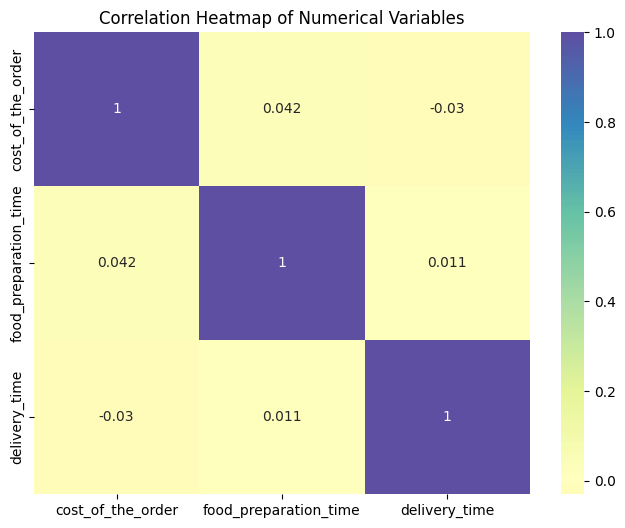

In [ ]:
# We Perform analysis using heatmap to find out co-relation between few variables.

numerical_data = df_fh[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Observation

* The correlation  between cost_of_the_order and food_preparation_time is close to zero (or very low), indicating little to no correlation.
* the correlation between cost_of_the_order and delivery_time is also very low - the cost of the order doesn’t influence delivery speed. Orders with different costs are delivered in similar time frames
* There is slight positive correlation between food_preparation_time and delivery_time , so orders taking more time to prepare may be longer delivery time.

# Rating and Delivery Time

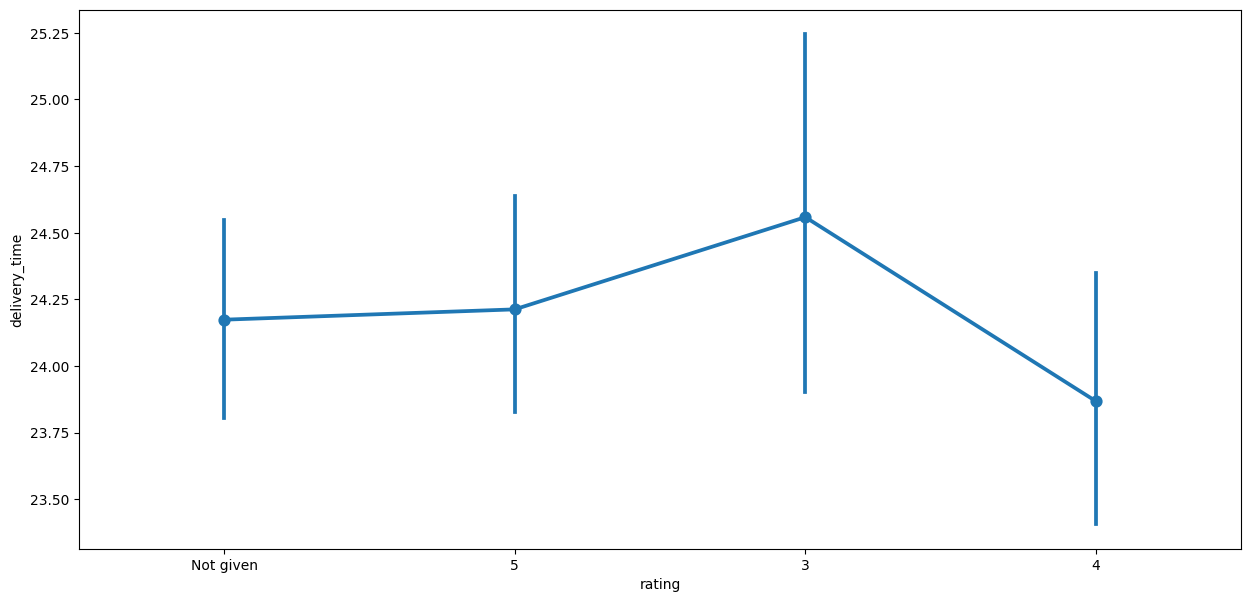

In [ ]:
# Relationship between rating and delivery time

plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df_fh)
plt.show()

## Observation
* Faster delivery times positively impact customer satisfaction, as reflected by higher ratings like 4 and 5.


# Cuisine and Cost of Order

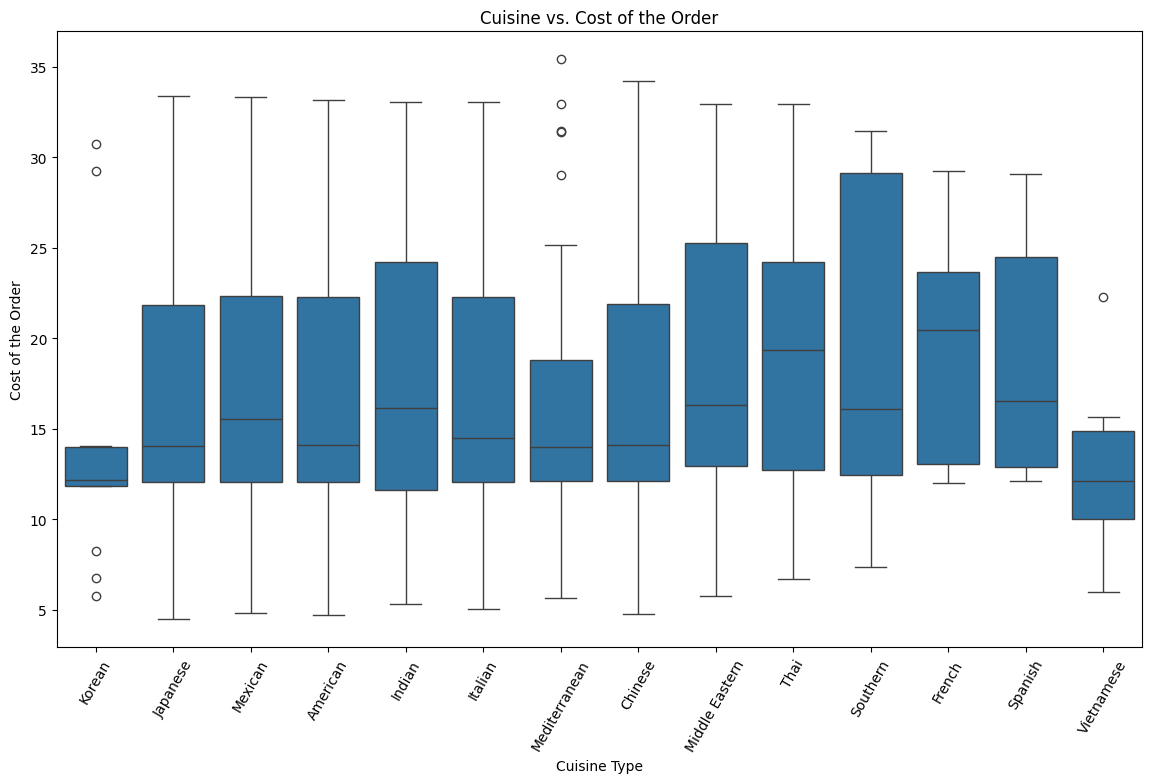

In [ ]:
  #Cuisine vs. Cost of the Order
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_fh, x='cuisine_type', y='cost_of_the_order')
plt.title("Cuisine vs. Cost of the Order")
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of the Order")
plt.xticks(rotation=60)
plt.show()



# Observations:

* American and Japanese  cuisine offers moderate pricing, so those 2 are the cuisines with highest orders.
* Mexican cuisines show lower and more consistent pricing
* Korean is low on price some orders have very low prices and some are highly priced which is unusual for korean.
* Looks like median price range for french cuisine are high so may be premium cuisine.
* Vietnamese,Korean and Mediteranian have few outliers , which can happen with few orders, may be the bulk of the orders were more.

# Cuisine and Food Preparation Time

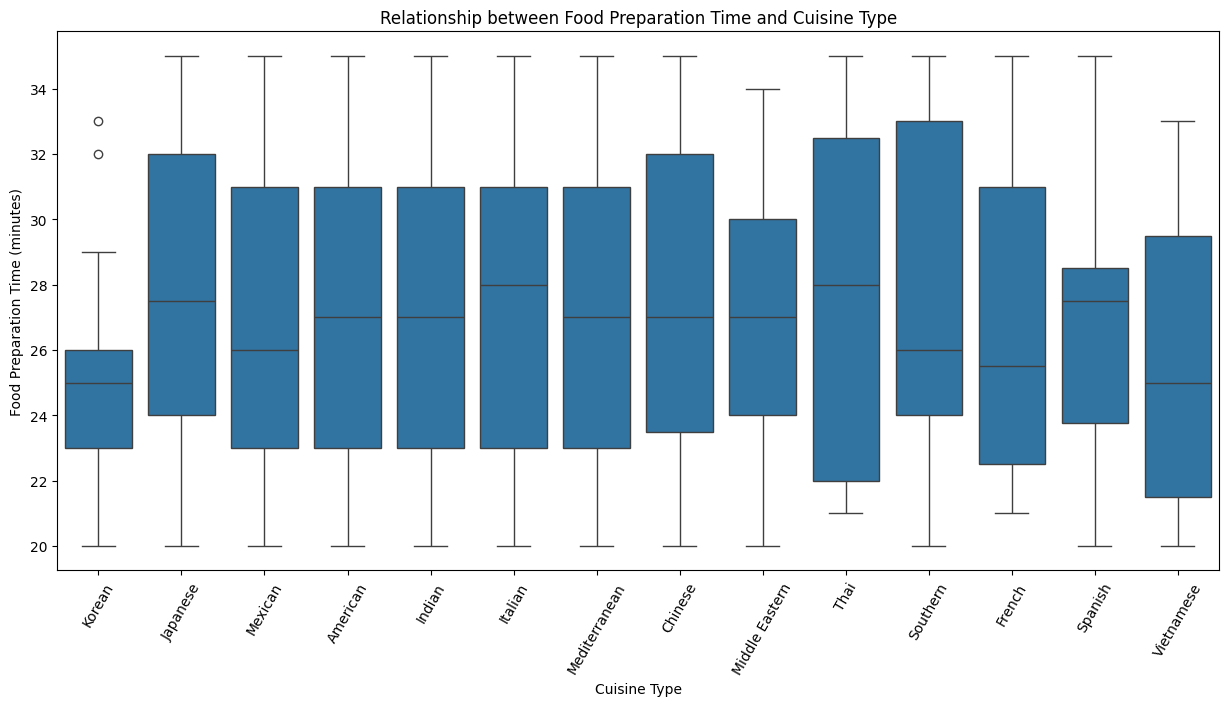

In [ ]:
# Generate the box plot
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_fh, x='cuisine_type', y='food_preparation_time')
plt.title("Relationship between Food Preparation Time and Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Food Preparation Time (minutes)")
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()

# Observations

* Thai and Spanish cuisine have higher median prep times
* American, Japanese , Indian and chinese have similar median food prep times.
* Korean have few outliers on food prep time taking longer than usual.

# Ratings and Delivery Time

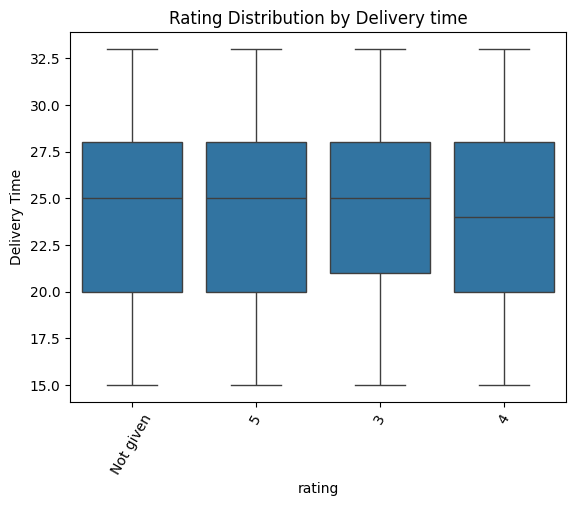

In [ ]:
# box plot to analyze the distribution of ratings for delivery times.
sns.boxplot(data=df_fh, x='rating', y='delivery_time')
plt.title("Rating Distribution by Cuisine Type")
plt.xlabel("rating")

# Add title and labels
plt.title("Rating Distribution by Delivery time")
plt.xlabel("rating")
plt.ylabel("Delivery Time")

# Rotate x-axis labels for readability
plt.xticks(rotation=60)

# Show plot
plt.show()

# Observations:

* Faster and consistent delivery times are linked to positive customer feedback.
* Not given ratings should be converted to meaningful ratings, the app should make it a way to promote users give valid ratings.

# Weekday/Weekend Orders and Delivery Time

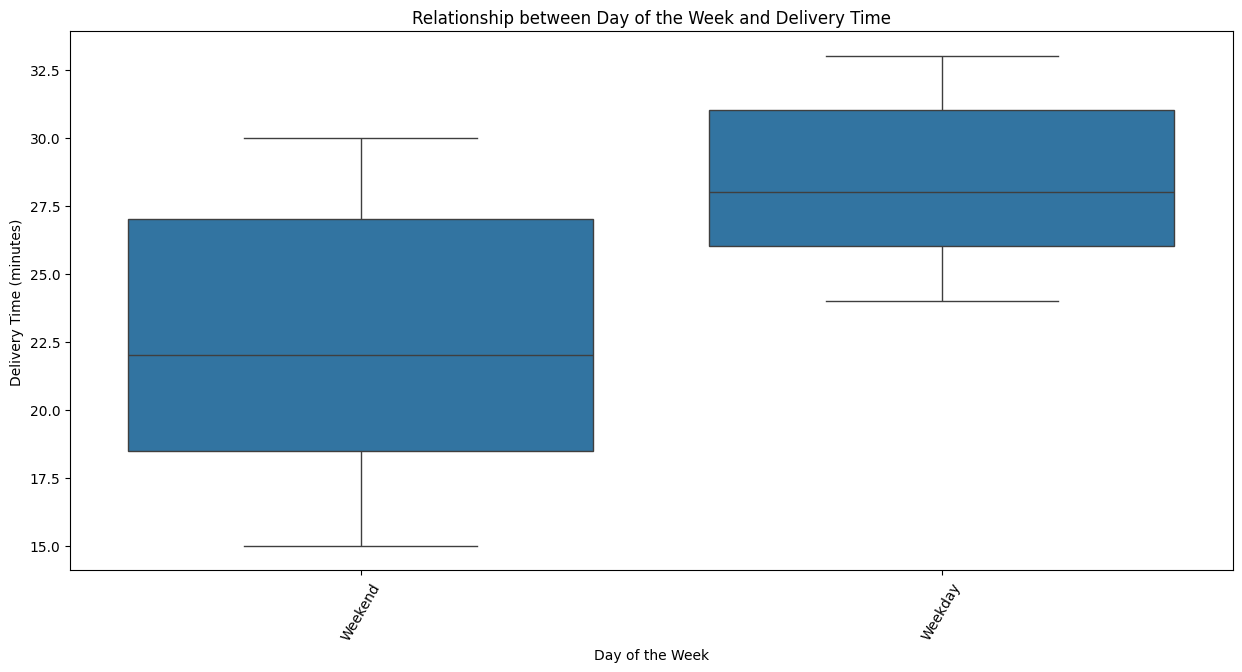

In [ ]:
#Generate the box plot to compare delivery times for weekday/weekend orders
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_fh, x='day_of_the_week', y='delivery_time')
plt.title("Relationship between Day of the Week and Delivery Time")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time (minutes)")
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()

# Observation

* Looks like weekday orders take more time to deliver than weekend
* It may be due to less resources working on weekdays as can be seen below, lot many orders during the weekend so may be lot many people working on the orders too.

In [ ]:
#Count orders for weekdays
weekday_order_count = df_fh[df_fh['day_of_the_week'] == 'Weekday'].shape[0]

# Count orders for weekends
weekend_order_count = df_fh[df_fh['day_of_the_week'] == 'Weekend'].shape[0]

# Display results
print("Weekday Orders:", weekday_order_count)
print("Weekend Orders:", weekend_order_count)

Weekday Orders: 547
Weekend Orders: 1351


# Rating and Cost of the orders

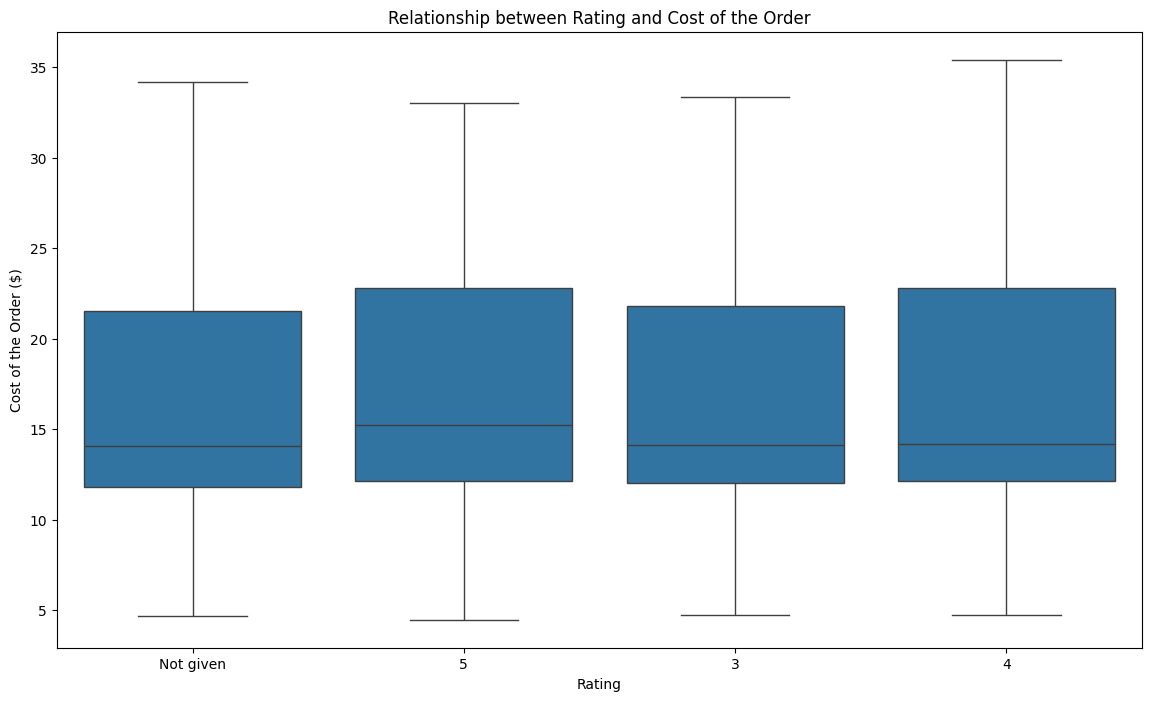

In [ ]:
# Box Plot to see the relation between rating and cost of order
plt.figure(figsize=(14, 8))
sns.boxplot(x='rating', y='cost_of_the_order', data=df_fh)
plt.title("Relationship between Rating and Cost of the Order")
plt.xlabel("Rating")
plt.ylabel("Cost of the Order ($)")
plt.show()

# Observation:
* Ratings for 4 and 5 , trend is cost of the food is slightly higher than for rating 3.
* Indicates higher spending may correlate with more premium items or larger orders, which could contribute to a better dining experience and thus higher satisfaction..


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

# Filter out the 'Not given' rating values for the count of valid ratings we need.
valid_ratings_data = df_fh[df_fh['rating'] != 'Not given']
count = len(valid_ratings_data)

'''Now we need to calculate averages so conversion of rating column to numeric.
Doing some research figured out pandas numeri function pd.to_numeric()
 converts the string values to numbers, and the errors='coerce'
argument ensures that invalid values (like "Not given") are replaced with NaN
'''
valid_ratings_data = df_fh[df_fh['rating'] != 'Not given'].copy()

valid_ratings_data['rating'] = pd.to_numeric(valid_ratings_data['rating'], errors='coerce')


# calculating average and count for each restaurant
restaurant_ratings = valid_ratings_data.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).round(1)

#Filtering restaurants with rating count > 50 and average rating >4
restaurants_qualify_promotions = restaurant_ratings[
    (restaurant_ratings['rating_count'] > 50) &
    (restaurant_ratings['average_rating'] > 4)]

restaurants_qualify_promotions


,rating_count,average_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.3
Blue Ribbon Sushi,73,4.2
Shake Shack,133,4.3
The Meatball Shop,84,4.5


In [ ]:
# Calculate the percentage of ratings which are 'Not given'

total_ratings = len(df_fh)


not_given_count = len(df_fh[df_fh['rating'] == 'Not given'])

percentage_not_given = (not_given_count / total_ratings) * 100

print(f"Percentage of 'Not given' ratings: {percentage_not_given:.2f}%")

Percentage of 'Not given' ratings: 38.78%


# Observations

There are key points to consider here for rating column.


1.   I dont think we need to impute rating column to replace 'Not given' values here as ratings usually are customer specific opinions.
2.   Imputing by taking mean or median values from other rating values might alter the actual rating values of a restaurant. It can show some restaurants good or bad with the artifical data. This will intorduce bias.
3. This will be inacurate when performing data analysis specially concering to businesses like restaurants.
4. The percentage of data which have ratings 'Not given' is around 38.78 %
5. So we can actually derive insights based on the actual ratings data we have (˜61%).



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# We are writing a function here to calculate revenue based on conditions

def calculate_revenue(cost_order):
    if cost_order > 20:
        return cost_order * 0.25  # 25% charge on orders over 20 dollars
    elif cost_order >= 5:
        return cost_order * 0.15  # 15% charge on orders between 5 and 20 dollars (inclusive of 20)
    else:
        return 0  # No revenue for orders 5 dollars or less

# Applying the function to the 'cost_of_the_order' column
df_fh['revenue'] = df_fh['cost_of_the_order'].apply(calculate_revenue)

# Calculate the total revenue by summing up the revenue column
total_revenue = df_fh['revenue'].sum()

# Display the total revenue
print(f"Total revenue generated by the company: {total_revenue:.2f} dollars ")

Total revenue generated by the company: 6166.30 dollars 


# Observations

Total revenue based on the above conditions like cost of eac orders is 6166.30 Dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

# Lets calcuate total time required to deliver the order
df_fh['total_delivery_time'] = df_fh['food_preparation_time'] + df_fh['delivery_time']

# Now lets filter orders that take more than 60 minutes in total
orders_above_60 = df_fh[df_fh['total_delivery_time'] > 60]

# Step 3: Count the number of orders taking more than 60 minutes
count_above_60 = len(orders_above_60)

# Step 4: Count the total number of orders
total_orders = len(df_fh)

# Step 5: Calculate the percentage of orders taking more than 60 minutes
percentage_above_60 = (count_above_60 / total_orders) * 100

# Step 6: Percentage of Orders taking > 60 mins for delivery.
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


# Observations

* 10.5 % of orders are taking more than 60 minutes which is more compared to the delivery mean time, so there is a strong case the delivery time optimisation can be looked into, analyse further by grasping thr order id and figuring out why the delay happened along with food prep time for those orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [45]:
# Write the code here
# Create data framwes for weekday and weekend
weekday_orders = df_fh[df_fh['day_of_the_week'] == 'Weekday']
weekend_orders = df_fh[df_fh['day_of_the_week'] == 'Weekend']

#The mean delivery time for weekday orders
weekday_orders_mean = weekday_orders['delivery_time'].mean()

#The mean delivery time for Weekend orders
weekend_orders_mean = weekend_orders['delivery_time'].mean()

print(f"The mean delivery time on weekdays is : {weekday_orders_mean:.2f} minutes ")
print(f"The mean delivery time on weekends is : {weekend_orders_mean:.2f} minutes ")
# Here when using f strings it is useful if we need to round off to any decimal digits we might need.

The mean delivery time on weekdays is : 28.34 minutes 
The mean delivery time on weekends is : 22.47 minutes 


# Observations

* We have seen that delivery time is faster during weekends, because there are more orders during weekends compared to wekdays hence may be more people working on delivery during weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

# Conclusions

*  Day of the Week Analysis:
Weekends see a higher volume of orders compared to weekdays.
* Delivery times are shorter on weekends This could indicate better resource allocation during peak demand periods.
* More than fifty percent of orders are American and Japanese.
* Company are also doing good with vouchers for top customers, which is a good strategy to retain customers.
* We have seen good quality food and shorter delivery time means good customer rating and that trend needs to continue.
* we also saw that ratings were not given by some customers.

# Recommendations

* Offer discounts or rewards for customers who leave detailed ratings, converting "Not Given" into actionable feedback. This way we have real valid data to focus on .
*  Focusing on reducing delays and standardizing delivery times could lead to higher ratings and improved customer satisfaction.
* Identifying and addressing root causes of delays could shift neutral or negative ratings to positive ones
* Focus on adding more resources during weekdays with shorter delivery times, there by improving revenue generation by seeling more food.
* Some analysis can be done to see if there are any specific events around NY city which can promt for more food orders, that way increase capacity in food and delivery (times) during those times.
* Since higher-cost orders tend to receive better ratings, the business could promote premium items or upsell options,  By highlighting higher-value items, the company may enhance customer satisfaction and increase revenue.
* Try and expand the reach for italian and chinese cuisine , as they look promising and also promote indian otjer cuisines like mexianto atarct customers seeking faster service.
* For better Operational efficieny , top seeling cuisines take pretty much similar time to cook, if we can optimize that and if restaurants can do better there, it will impact delivery time and hence better customer satisfaction.




---

In [44]:
!jupyter nbconvert --to html /content/drive/MyDrive/Project1/Food_Hub_Project1_Full_Code.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Project1/Food_Hub_Project1_Full_Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1053373 bytes to /content/drive/MyDrive/Project1/Food_Hub_Project1_Full_Code.html
